In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

## Install libraries

```bash
conda create -n edu4 python=3.11 jupyter matplotlib
```

```bash 
! pip install -U -r requirements.txt
```

```bash
! pip install -U numpy
! pip install -U scikit-learn
```

In [2]:
! ls

data
images
mid_terms.ipynb
mid_terms_sm.ipynb
requirements.txt
workshop_1_linear_regression.ipynb
workshop_2_logistic_regression_lda_qda_nb.ipynb
workshop_3_resampling_methods.ipynb
workshop_4_model_selection_and_regularizations.ipynb
workshop_5_beyond_linearity.ipynb
workshop_6_trees_boosting_bagging.ipynb
workshop_7_support_vector_machines.ipynb


In [3]:
! pip install -U -r requirements.txt

## Update repository

In [4]:
! git pull

Already up to date.


## Add import path

In [5]:
import os
import sys
import gc

In [6]:
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [7]:
del module_path

## Organize imports

In [8]:
import multiprocessing
from pathlib import Path

In [9]:
import seaborn as sns

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import (StandardScaler, PolynomialFeatures, 
                                   SplineTransformer, LabelEncoder)
from sklearn.feature_selection import (SequentialFeatureSelector as SFS, 
                                       SelectFromModel)
from sklearn.discriminant_analysis import (LinearDiscriminantAnalysis, 
                                           QuadraticDiscriminantAnalysis)
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.svm import SVC, LinearSVC, SVR, LinearSVR
import xgboost as xgb
from xgboost import XGBRegressor, XGBClassifier
from sklearn.metrics import (mean_absolute_error, mean_squared_error, 
                             classification_report, confusion_matrix)

#### Number of CPU cores

In [11]:
workers = multiprocessing.cpu_count()
workers

8

## Initialize path

In [12]:
DATA = Path('data')
PATH = DATA / 'log_regr_lda_qda_np'
LR_PATH = DATA / 'linear_regression'
PUMPKIN_DIR = PATH / 'Pumpkin_Seeds_Dataset'
IRIS_DIR = PATH / 'iris'
PUMPKIN_DIR.mkdir(exist_ok=True, parents=True)
IRIS_DIR.mkdir(exist_ok=True, parents=True)

In [13]:
! ls

data
images
mid_terms.ipynb
mid_terms_sm.ipynb
requirements.txt
workshop_1_linear_regression.ipynb
workshop_2_logistic_regression_lda_qda_nb.ipynb
workshop_3_resampling_methods.ipynb
workshop_4_model_selection_and_regularizations.ipynb
workshop_5_beyond_linearity.ipynb
workshop_6_trees_boosting_bagging.ipynb
workshop_7_support_vector_machines.ipynb


## Load IRIS dataset

In [14]:
SEED = 2022

In [15]:
iris_url = 'https://www.kaggle.com/datasets/uciml/iris/download?datasetVersionNumber=2'

#### Load dataset

In [16]:
! ls {IRIS_DIR}

Iris.csv        database.sqlite


In [17]:

df = pd.read_csv(IRIS_DIR / 'Iris.csv')

In [18]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [19]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [20]:
y = df['Species']
X = df.drop(columns=['Id', 'Species'], axis=1)
X.shape, y.shape, df['Species'].value_counts()

((150, 4),
 (150,),
 Iris-setosa        50
 Iris-versicolor    50
 Iris-virginica     50
 Name: Species, dtype: int64)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=SEED)

In [22]:
y_train

38         Iris-setosa
82     Iris-versicolor
89     Iris-versicolor
1          Iris-setosa
74     Iris-versicolor
            ...       
24         Iris-setosa
18         Iris-setosa
88     Iris-versicolor
112     Iris-virginica
125     Iris-virginica
Name: Species, Length: 120, dtype: object

## Scaling / standartizing the parameters

In [23]:
scaler = StandardScaler().fit(X_train)

In [24]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Classification trees

In [25]:
cls_svc = SVC(C=1.0, 
              kernel='linear', 
              verbose=True,
              decision_function_shape='ovr',
              random_state=2022)

In [26]:
cls_lin = LinearSVC(C=1.0, 
                    verbose=True,
                    random_state=2022,
                    max_iter=10000)

In [27]:
cls_rbf = SVC(C=1.0, 
              kernel='rbf', 
              verbose=True,
              decision_function_shape='ovr',
              random_state=2022)

## Train models

In [28]:
cls_svc = cls_svc.fit(X_train, y_train)
cls_svc

[LibSVM]*
optimization finished, #iter = 23
obj = -0.967123, rho = 1.399686
nSV = 4, nBSV = 0
*
optimization finished, #iter = 14
obj = -0.317026, rho = 0.258360
nSV = 3, nBSV = 0
*.*
optimization finished, #iter = 136
obj = -14.227262, rho = -3.059727
nSV = 23, nBSV = 18
Total nSV = 27


SVC(kernel='linear', random_state=2022, verbose=True)

In [29]:
y_pred = cls_svc.predict(X_test)

In [30]:
cr = classification_report(y_test, y_pred)
print(cr)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         9
Iris-versicolor       0.88      0.88      0.88         8
 Iris-virginica       0.92      0.92      0.92        13

       accuracy                           0.93        30
      macro avg       0.93      0.93      0.93        30
   weighted avg       0.93      0.93      0.93        30



<AxesSubplot: >

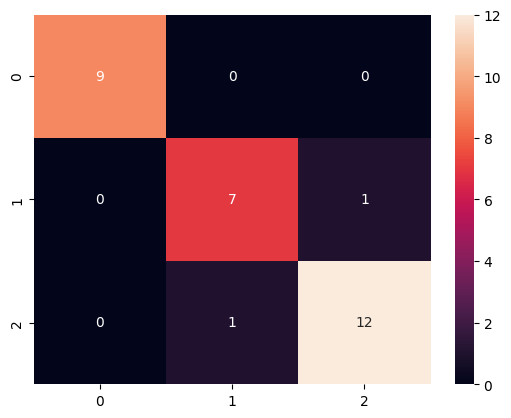

In [31]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')

In [32]:
cls_lin = cls_lin.fit(X_train, y_train)
cls_lin

[LibLinear].....**.
optimization finished, #iter = 60
Objective value = -1.093558
nSV = 6
....................*
optimization finished, #iter = 203
Objective value = -80.211382
nSV = 106
...

LinearSVC(max_iter=10000, random_state=2022, verbose=True)

......*
optimization finished, #iter = 93
Objective value = -14.183427
nSV = 33


In [33]:
y_pred = cls_lin.predict(X_test)

In [34]:
cr = classification_report(y_test, y_pred)
print(cr)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         9
Iris-versicolor       0.80      1.00      0.89         8
 Iris-virginica       1.00      0.85      0.92        13

       accuracy                           0.93        30
      macro avg       0.93      0.95      0.94        30
   weighted avg       0.95      0.93      0.93        30



<AxesSubplot: >

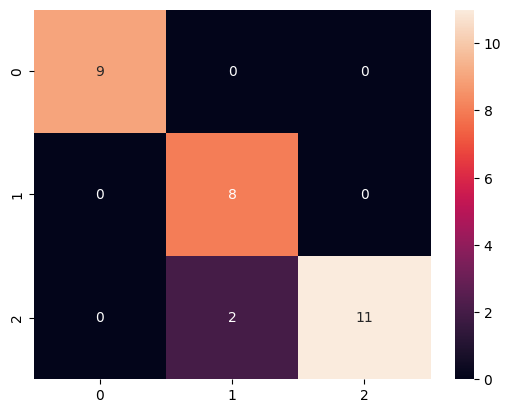

In [35]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')

In [36]:
cls_rbf = cls_rbf.fit(X_train, y_train)
cls_rbf

[LibSVM]*
optimization finished, #iter = 34
obj = -3.501482, rho = -0.020321
nSV = 10, nBSV = 2
*
optimization finished, #iter = 37
obj = -2.907336, rho = 0.095484
nSV = 11, nBSV = 1
*
optimization finished, #iter = 56
obj = -21.722805, rho = -0.054616
nSV = 37, nBSV = 28
Total nSV = 47


SVC(random_state=2022, verbose=True)

In [37]:
y_pred = cls_rbf.predict(X_test)

In [38]:
cr = classification_report(y_test, y_pred)
print(cr)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         9
Iris-versicolor       0.89      1.00      0.94         8
 Iris-virginica       1.00      0.92      0.96        13

       accuracy                           0.97        30
      macro avg       0.96      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



<AxesSubplot: >

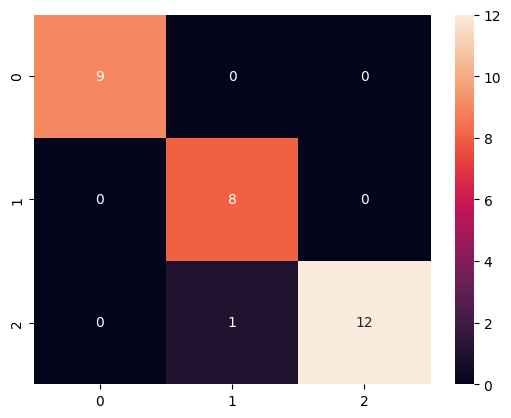

In [39]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')

## Classification for high dimensional features

Classification of the hig dimensional feature with kernel

#### Initialize model

In [40]:
cls_ker = SVC(C=1.0, 
              kernel='rbf', 
              verbose=True,
              decision_function_shape='ovr',
              random_state=2022)

#### Prepare data

In [41]:
SEED = 2022

In [42]:
studen_scores_path = PUMPKIN_DIR / 'Pumpkin_Seeds_Dataset.xlsx'

In [43]:
df = pd.read_excel(studen_scores_path)
df

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
0,56276,888.242,326.1485,220.2388,56831,267.6805,0.7376,0.9902,0.7453,0.8963,1.4809,0.8207,Çerçevelik
1,76631,1068.146,417.1932,234.2289,77280,312.3614,0.8275,0.9916,0.7151,0.8440,1.7811,0.7487,Çerçevelik
2,71623,1082.987,435.8328,211.0457,72663,301.9822,0.8749,0.9857,0.7400,0.7674,2.0651,0.6929,Çerçevelik
3,66458,992.051,381.5638,222.5322,67118,290.8899,0.8123,0.9902,0.7396,0.8486,1.7146,0.7624,Çerçevelik
4,66107,998.146,383.8883,220.4545,67117,290.1207,0.8187,0.9850,0.6752,0.8338,1.7413,0.7557,Çerçevelik
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,79637,1224.710,533.1513,190.4367,80381,318.4289,0.9340,0.9907,0.4888,0.6672,2.7996,0.5973,Ürgüp Sivrisi
2496,69647,1084.318,462.9416,191.8210,70216,297.7874,0.9101,0.9919,0.6002,0.7444,2.4134,0.6433,Ürgüp Sivrisi
2497,87994,1210.314,507.2200,222.1872,88702,334.7199,0.8990,0.9920,0.7643,0.7549,2.2828,0.6599,Ürgüp Sivrisi
2498,80011,1182.947,501.9065,204.7531,80902,319.1758,0.9130,0.9890,0.7374,0.7185,2.4513,0.6359,Ürgüp Sivrisi


In [44]:
df.shape

(2500, 13)

## Data analysis

In [45]:
df['Class'].value_counts() 

Çerçevelik       1300
Ürgüp Sivrisi    1200
Name: Class, dtype: int64

In [46]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Area,2500.0,80658.220800,13664.510228,47939.0000,70765.000000,79076.00000,89757.500000,136574.0000
Perimeter,2500.0,1130.279015,109.256418,868.4850,1048.829750,1123.67200,1203.340500,1559.4500
Major_Axis_Length,2500.0,456.601840,56.235704,320.8446,414.957850,449.49660,492.737650,661.9113
Minor_Axis_Length,2500.0,225.794921,23.297245,152.1718,211.245925,224.70310,240.672875,305.8180
Convex_Area,2500.0,81508.084400,13764.092788,48366.0000,71512.000000,79872.00000,90797.750000,138384.0000
Equiv_Diameter,2500.0,319.334230,26.891920,247.0584,300.167975,317.30535,338.057375,417.0029
Eccentricity,2500.0,0.860879,0.045167,0.4921,0.831700,0.86370,0.897025,0.9481
Solidity,2500.0,0.989492,0.003494,0.9186,0.988300,0.99030,0.991500,0.9944
Extent,2500.0,0.693205,0.060914,0.4680,0.658900,0.71305,0.740225,0.8296
Roundness,2500.0,0.791533,0.055924,0.5546,0.751900,0.79775,0.834325,0.9396


In [47]:
y = df['Class']
X = df.drop(columns=['Class'], axis=1)

In [48]:
y = y.replace('Çerçevelik', 0).replace('Ürgüp Sivrisi', 1)

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=.25, 
                                                    random_state=SEED)

In [50]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1875, 12), (1875,), (625, 12), (625,))

#### Scaling Data

In [51]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### Fit the model

In [52]:
cls_ker = cls_ker.fit(X_train, y_train)
cls_ker

[LibSVM]*
optimization finished, #iter = 772
obj = -512.935516, rho = 0.316476
nSV = 582, nBSV = 525
Total nSV = 582


SVC(random_state=2022, verbose=True)

In [53]:
y_pred = cls_ker.predict(X_test)

In [54]:
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.87      0.93      0.90       335
           1       0.92      0.84      0.88       290

    accuracy                           0.89       625
   macro avg       0.89      0.89      0.89       625
weighted avg       0.89      0.89      0.89       625



<AxesSubplot: >

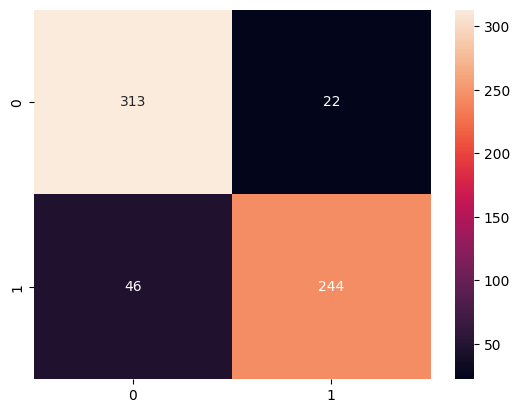

In [55]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')

## Support vector Regression

There are also support vector regression models

#### Initialize the model

In [56]:
svr_lin = LinearSVR(C=1.0, 
              verbose=True,
              max_iter=10000,
              random_state=2022)

svr_rbf = SVR(C=1.0, 
              kernel='rbf', 
              verbose=True)

#### Prepare the data

In [57]:
pertol_consumption_path = LR_PATH / 'petrol_consumption.csv'

In [58]:
df = pd.read_csv(pertol_consumption_path)
df

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.00,3571,1976,0.525,541
1,9.00,4092,1250,0.572,524
2,9.00,3865,1586,0.580,561
3,7.50,4870,2351,0.529,414
4,8.00,4399,431,0.544,410
5,10.00,5342,1333,0.571,457
6,8.00,5319,11868,0.451,344
7,8.00,5126,2138,0.553,467
8,8.00,4447,8577,0.529,464
9,7.00,4512,8507,0.552,498


In [59]:
df.shape

(48, 5)

In [60]:
print(df.describe().round(2).T)

                              count     mean      std      min      25%  \
Petrol_tax                     48.0     7.67     0.95     5.00     7.00   
Average_income                 48.0  4241.83   573.62  3063.00  3739.00   
Paved_Highways                 48.0  5565.42  3491.51   431.00  3110.25   
Population_Driver_licence(%)   48.0     0.57     0.06     0.45     0.53   
Petrol_Consumption             48.0   576.77   111.89   344.00   509.50   

                                  50%      75%       max  
Petrol_tax                       7.50     8.12     10.00  
Average_income                4298.00  4578.75   5342.00  
Paved_Highways                4735.50  7156.00  17782.00  
Population_Driver_licence(%)     0.56     0.60      0.72  
Petrol_Consumption             568.50   632.75    968.00  


#### Prepare dataset

In [61]:
y = df['Petrol_Consumption']
X = df[['Average_income', 'Paved_Highways',
       'Population_Driver_licence(%)', 'Petrol_tax']]

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=SEED)

#### Scale the parameters

In [63]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### Fit the models

In [64]:
svr_lin = svr_lin.fit(X_train, y_train)

[LibLinear]
optimization finished, #iter = 2
Objective value = -21577.000000
nSV = 38


In [65]:
y_pred = svr_lin.predict(X_test)

In [66]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'Mean absolute error: {mae:.2f}')
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')

Mean absolute error: 500.60
Mean squared error: 276462.40
Root mean squared error: 525.80


In [67]:
svr_rbf = svr_rbf.fit(X_train, y_train)

[LibSVM]*
optimization finished, #iter = 20
obj = -2575.559924, rho = -574.725063
nSV = 38, nBSV = 36


In [68]:
y_pred = svr_rbf.predict(X_test)

In [69]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'Mean absolute error: {mae:.2f}')
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')

Mean absolute error: 118.32
Mean squared error: 26557.07
Root mean squared error: 162.96
